# Experiments

In this notebook, we will experiment with different settings of GA and different approaches how to simulate chetah's movement.

## Imports

In [1]:
from evolution import Evolution
from cheetah_laboratory import ClassicNNCheetahLab
from arena import Arena
import gymnasium as gym

import plotly.express as px
import numpy as np
import pandas as pd
import logging

## Experiment 1 (Test implementation of GA)

/home/vita/School/Ms./2/EvoRobotics/GeneticCheetah/venv/lib/python3.9/site-packages/pygad/pygad.py:1074: UserWarning: Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.
  if not self.suppress_warnings: warnings.warn("Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.")
/home/vita/School/Ms./2/EvoRobotics/GeneticCheetah/venv/lib/python3.9/site-packages/pygad/pygad.py:1083: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  if not self.suppress_warnings: warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is lar

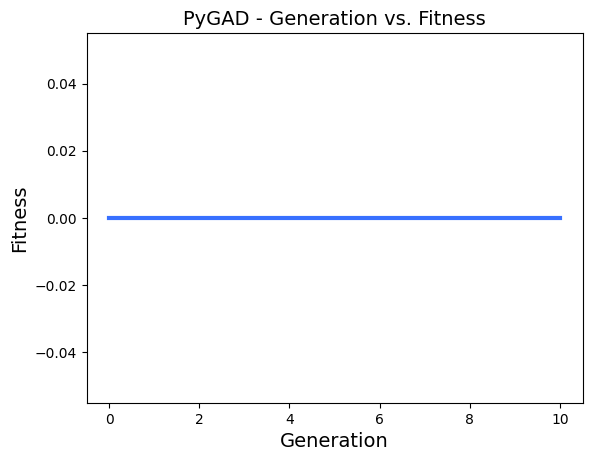

In [6]:
arena = Arena()
cheetah_lab = ClassicNNCheetahLab([17, 10, 6])
evolution = Evolution(cheetah_lab, arena)

parameters = {
    'num_generations': 10,
    'sol_per_pop': 10,
    'num_parents_mating': 4,
    'init_range_low': -2,
    'init_range_high': 5,
    'parent_selection_type': 'sss',
    'keep_parents': 1,
    'crossover_type': 'single_point',
    'mutation_type': 'random',
    'mutation_percent_genes': 10,
}

evolution.run_evolution(parameters)
evolution.plot_fitness()

c:\Users\havel\Documents\skola\CUNI - AI INF\predmety\2 Letny semester\Evolucna robotika\evrobot\lib\site-packages\pygad\pygad.py:1074: UserWarning: Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.
  if not self.suppress_warnings: warnings.warn("Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.")
----------------------------------------------------------------------
                           PyGAD Lifecycle                           
Step                   Handler                            Output Shape
Fitness Function       _fitness_func()                    (1)        
----------------------------------------------------------------------
Parent Selection       steady_state_selection()           (4, 126)   
Number of Parents: 4
-----------------------------------------------------

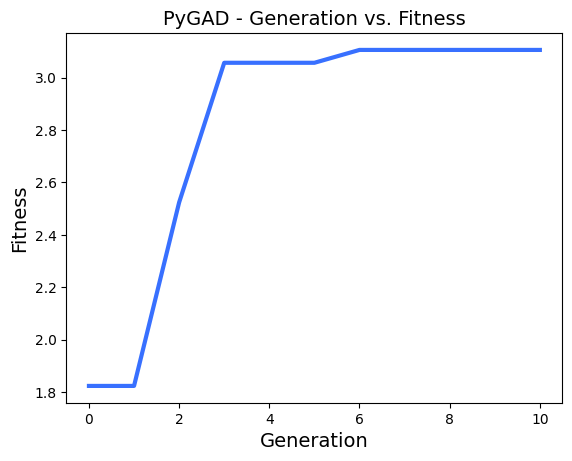

In [2]:
arena = Arena()
cheetah_lab = ClassicNNCheetahLab([17, 5, 6])
evolution = Evolution(cheetah_lab, arena)

parameters = {
    'num_generations': 10,
    'sol_per_pop': 10,
    'num_parents_mating': 4,
    'init_range_low': -2,
    'init_range_high': 5,
    'parent_selection_type': 'sss',
    'keep_parents': 1,
    'crossover_type': 'single_point',
    'mutation_type': 'random',
    'mutation_percent_genes': 10,
    # 'save_solutions': False,
}

evolution.run_evolution(parameters)
evolution.plot_fitness()

## List of tests:
- Depth/Width comparison - Max Fitness heatmap
    - X-axis - width (number of neurons in one layer)
    - Y-axis - depth (number of layers)
    - *NOTE:* total number of neurons should be aproximately the same.
- Activation function (final activation function is always tahn)
    - logsig
    - tanh
    - relu
- Pickup the best choices altogether and compare if more generations are better or bigger population in each generation. (*NOTE:* number of individuals should stay the same)

# Tests

In [3]:
arena = Arena()
logger = logging.basicConfig(filename='log.log', encoding='utf-8', level=logging.DEBUG) # None
# use logger = None for printing info into terminal 

default_parameters = {
    'num_generations': 10,
    'sol_per_pop': 10,
    'num_parents_mating': 4,
    'init_range_low': -2,
    'init_range_high': 5,
    'parent_selection_type': 'sss',
    'keep_parents': 1,
    'crossover_type': 'single_point',
    'mutation_type': 'random',
    'mutation_percent_genes': 10,
    "logger": logger,
}

### Depth/Width comparison

In [7]:
def evolution_heatmap(x_axis, y_axis, parameters=default_parameters, iterations=5, actv_func=None):
    width, depth = x_axis, y_axis

    best_solutions = [([None] * len(depth)) for _ in range(len(width))]
    best_solution_fitness = best_solutions.copy() # copy empty list with correct shape

    for x, w in enumerate(width):
        for y, d in enumerate(depth):
            hidden = [w]*d
            cheetah_lab = ClassicNNCheetahLab([17, *hidden, 6], actv_func)
            solution = list()
            fitness = list()

            for _ in range(iterations):
                evolution = Evolution(cheetah_lab, arena)
                _ = evolution.run_evolution(parameters)

                s, f, _ = evolution.get_best_solutions()
                solution.append(s)
                fitness.append(f)
                
            best_solutions[x][y] = solution
            best_solution_fitness[x][y] = fitness

    return best_solutions, best_solution_fitness


In [60]:
width = list(range(2, 20, 3)) # list((5,10,15))
depth = list(range(1,6)) # list((1,2,3))

parameters = default_parameters.copy() # not necessary - used only for heatmap title

best_solutions, best_solution_fitness = evolution_heatmap(width, depth, iterations=5)

c:\Users\havel\Documents\skola\CUNI - AI INF\predmety\2 Letny semester\Evolucna robotika\evrobot\lib\site-packages\pygad\pygad.py:1074: UserWarning:

Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.

----------------------------------------------------------------------
                           PyGAD Lifecycle                           
Step                   Handler                            Output Shape
Fitness Function       _fitness_func()                    (1)      
----------------------------------------------------------------------
Parent Selection       steady_state_selection()           (4, 54)  
Number of Parents: 4
----------------------------------------------------------------------
Crossover              single_point_crossover()           (4, 54)  
----------------------------------------------------------------------
Mutation               random_mutation()       

In [61]:
fitness = np.mean(np.array(best_solution_fitness), axis=2)

df = px.data.medals_wide(indexed=True)
fig = px.imshow(
    fitness.T,
    title="Width/Depth comparison of best individual in {} generations".format(parameters["num_generations"]),
    labels=dict(x="NN width", y="NN depth", color="Fitness"),
    x=list(map(str,width)), 
    y=list(map(str,depth)),
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show()

In [62]:
width = list(range(2, 20, 3))
depth = list(range(1,6))

parameters = default_parameters.copy()
parameters["num_generations"] = 50

best_solutions, best_solution_fitness = evolution_heatmap(width, depth, iterations=5)

c:\Users\havel\Documents\skola\CUNI - AI INF\predmety\2 Letny semester\Evolucna robotika\evrobot\lib\site-packages\pygad\pygad.py:1074: UserWarning:

Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.

----------------------------------------------------------------------
                           PyGAD Lifecycle                           
Step                   Handler                            Output Shape
Fitness Function       _fitness_func()                    (1)      
----------------------------------------------------------------------
Parent Selection       steady_state_selection()           (4, 54)  
Number of Parents: 4
----------------------------------------------------------------------
Crossover              single_point_crossover()           (4, 54)  
----------------------------------------------------------------------
Mutation               random_mutation()       

In [63]:
fitness = np.mean(np.array(best_solution_fitness), axis=2)

df = px.data.medals_wide(indexed=True)
fig = px.imshow(
    fitness.T,
    title="Width/Depth comparison of best individual in {} generations".format(parameters["num_generations"]),
    labels=dict(x="NN width", y="NN depth", color="Fitness"),
    x=list(map(str,width)), 
    y=list(map(str,depth)),
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show()

In [27]:
best_cheetah = ClassicNNCheetahLab([17, 5, 6])
genom_length = best_cheetah.get_genom_length()
print("Size of genom: ", genom_length)

Size of genom:  126


### Activation functions

In [4]:
actv_func = {
    "tanh": np.tanh,
    "relu": np.vectorize(lambda x: np.maximum(0, x)),
    "logsig": None # default
}

In [25]:
width = [2]
depth = [1, 3, 5]
 
assert len(width) == 1 or len(depth) == 1, "at least one dimension must have only one value" # Must be 1D for boxplots

parameters = default_parameters.copy()
parameters["num_generations"] = 50

In [22]:
use_depth = len(width) == 1

if use_depth:
    axis = 0
    label = "depth"
else:
    axis = 1
    label = "width"

all_solutions = list()
pre_df = list()

for name, func in actv_func.items():
    best_solutions, best_solution_fitness = evolution_heatmap(width, depth, iterations=10, actv_func=func)
    all_solutions.append(best_solutions)

    fitness = np.squeeze(np.array(best_solution_fitness), axis=axis)# delete  
    
    for s, fits in zip((depth if use_depth else width), fitness):
        pre_df += [(name, str(s), fit) for fit in fits]

df = pd.DataFrame(pre_df, columns=["function", label, "fitness"])


c:\Users\havel\Documents\skola\CUNI - AI INF\predmety\2 Letny semester\Evolucna robotika\evrobot\lib\site-packages\pygad\pygad.py:1074: UserWarning:

Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.

----------------------------------------------------------------------
                           PyGAD Lifecycle                           
Step                   Handler                            Output Shape
Fitness Function       _fitness_func()                    (1)      
----------------------------------------------------------------------
Parent Selection       steady_state_selection()           (4, 54)  
Number of Parents: 4
----------------------------------------------------------------------
Crossover              single_point_crossover()           (4, 54)  
----------------------------------------------------------------------
Mutation               random_mutation()       

In [24]:
fig = px.box(df, y="fitness", x=label, color="function", points="all", orientation='v',
             title="Fitness dispersion based on NN depth and activation function of hidden layers")
fig.show()

In [34]:
fig = px.box(df, y="fitness", x="function", points="all", orientation='v',
             title="Fitness dispersion based on activation function in hidden layers ({} = {}, all sizes combined)".format(label, width[0] if use_depth else depth))
fig.show()